# Conclusions
The Summary Statistics table indicates that Capomulin and Ramicane are the most effective drug treatments because their mean tumor volume (in $mm^{3}$) is the lowest at 40.675741 and 40.216745, respectively. Their lower standard deviations and variances also imply that Capomulin and Ramican produce more precise results.

Outliers are data points that fall outsid of the IQR: the range of each dataset that encompasses 25-75% of the data. Of the four drug regimens (Capomulin, Ramicane, Infubinol, and Ceftamin) selected, Infubinol was the only regimen to have an outlier when looking at final tumor volume (in $mm^{3}$). Along with its higher final tumor volume, this suggests that Infubinol may be less successful than the other three drugs tested.

Correlation coefficients greater than or equal to 0.7 indicate a strong correlation between the two factors being compared. Looking at the scatterplot comparing a mouse's weight (in $g$) and their average tumor volumes (in $mm^{3}$) under Capomulin treatment, the tight slope predicts a relatively strong correlation. The correlation coefficient of around 0.84 confirms this prediction.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Data filepaths
mouse_path = '../Resources/Mouse_metadata.csv'
study_path = '../Resources/Study_results.csv'

# Reading the filepaths as csv
mouse_metadata = pd.read_csv(mouse_path)
study_results = pd.read_csv(study_path)

# Combining the data into one dataset
mouse_results = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')

# Previewing the merged dataset
mouse_results.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


# Observation and Insights

In [2]:
# Checking for the number of mice
no_mice = mouse_results['Mouse ID'].nunique()
print(f'There are {no_mice} unique mice.')

There are 249 unique mice.


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint
duplicate_ID = mouse_results.loc[mouse_results.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID']
print(duplicate_ID)

# Optional: Get all the data for the duplicate mouse ID
mouse_results.loc[mouse_results['Mouse ID'] == 'g989', :]

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Creating a clean dataframe by dropping the duplicate mouse by its ID
clean_data = mouse_results.drop_duplicates(subset=['Mouse ID', 'Timepoint'])
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice in the clean dataframe
clean_no_mice = clean_data['Mouse ID'].nunique()
print(f'There are now {clean_no_mice} unique mice.')

There are now 249 unique mice.


# Summary Statistics
Using GroupBy, mean, median, variance, standard deviation, and SEM were calculated for each drug regimen. The calculated data was displayed by creating a new dataframe, and also by using the aggregate method.

In [6]:
# Generating a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
by_drug = clean_data.groupby(['Drug Regimen'])

# Calculating the mean for each drug regimen
tumor_mean = by_drug['Tumor Volume (mm3)'].mean()

# Calculating the median for each drug regimen
tumor_median = by_drug['Tumor Volume (mm3)'].median()

# Calculating the variance for each drug regimen
tumor_var = by_drug['Tumor Volume (mm3)'].var()

# Calculaitng the standard deviation for each drug regimen
tumor_std = by_drug['Tumor Volume (mm3)'].std()

# Calculating hte SEM for each drug regimen
tumor_sem = by_drug['Tumor Volume (mm3)'].sem()

# Putting the calculated data into a dataframe
summary_stats = pd.DataFrame({'Mean Tumor Volume': tumor_mean,
                             'Median Tumor Volume': tumor_median,
                             'Tumor Volume Variance': tumor_var,
                             'Tumor Volume Standard Deviation': tumor_std, 
                             'Tumor Volume SEM': tumor_sem})
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# Using the aggregation method, produce the same statistics in a single line
by_drug['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Bar and Pie Charts
- A bar plot of the number of timepoints for all mice tested for each drug regimen (using Pandas)
- A bar plot of the number of timepoints for all mice tested for each drug regimen (using Pyplot)
- A pie plot of the distribution of female vs. male mice (using Pandas)
- A pie plot of the distribution of female vs. male mice (using Pyplot)

## Bar Plots

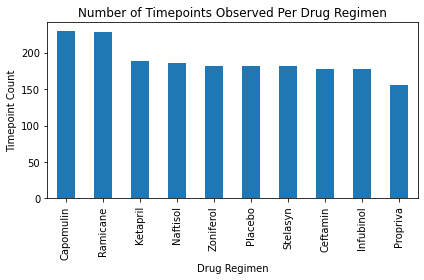

In [8]:
# A bar plot of the number of timepoints for all mice tested for each drug regimen (using Pandas)
# Counting the number of times each drug regimen was observed 
drug_count = clean_data['Drug Regimen'].value_counts()

# Plotting the timepoint counts for each drug regimen
drug_count.plot(kind='bar', xlabel='Drug Regimen', ylabel='Timepoint Count',
                title='Number of Timepoints Observed Per Drug Regimen')
plt.tight_layout()

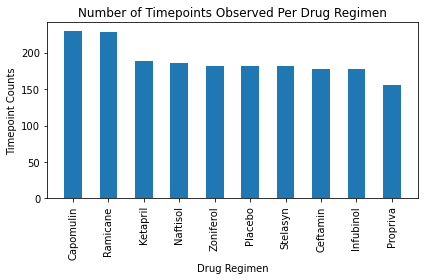

In [9]:
# A bar plot of the number of timepoints for all mice tested for each drug regimen (using Pyplot)
# Separating drug_count into list of indices and list of values
drug_name = drug_count.index.values
timepoint_count = drug_count.values

# Plotting the timepoint counts for each drug regimen
plt.bar(drug_name, timepoint_count, width=.5)
plt.title('Number of Timepoints Observed Per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Timepoint Counts')
plt.xticks(rotation='vertical')
plt.tight_layout()

## Pie Charts

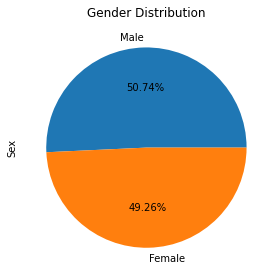

In [10]:
# A pie plot of the distribution of female vs. male mice (using Pandas)
# Counting the number of female and male mice
gender_count = clean_data['Sex'].value_counts()

# Creating a pie chart based on the distribution
gender_count.plot(kind='pie', title='Gender Distribution', autopct='%1.2f%%')
plt.tight_layout()

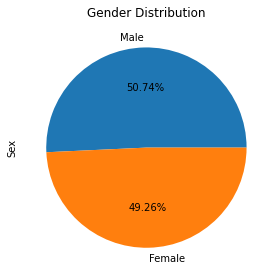

In [11]:
# A pie plot of the distribution of female vs. male mice (using Pyplot)
# Creating labels corresponding to each gender
labels = ['Male', 'Female']
# The values corresponding to each gender
counts = [(clean_data['Sex'] == 'Male').sum(), (clean_data['Sex'] == 'Female').sum()]

# Creating a pie chart based on the distribution
plt.pie(counts, labels=labels, autopct='%1.2f%%')
plt.title('Gender Distribution')
plt.ylabel('Sex')
plt.tight_layout()

# Quartiles, Outliers, and Boxplots

In [12]:
# Calculating the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin (separating each using GroupBy)
capomulin = clean_data.loc[clean_data['Drug Regimen'] == 'Capomulin']
ramicane = clean_data.loc[clean_data['Drug Regimen'] == 'Ramicane']
infubinol = clean_data.loc[clean_data['Drug Regimen'] == 'Infubinol']
ceftamin = clean_data.loc[clean_data['Drug Regimen'] == 'Ceftamin']

# Start by getting the last (greatest) timepoint for each mouse 
capomulin_last = capomulin.groupby('Mouse ID').max()['Timepoint']
ramicane_last = ramicane.groupby('Mouse ID').max()['Timepoint']
infubinol_last = infubinol.groupby('Mouse ID').max()['Timepoint']
ceftamin_last = ceftamin.groupby('Mouse ID').max()['Timepoint']

# Merging this group df with the original dataframe to get the tumor volume at the last timepoint
capomulin_df = pd.merge(pd.DataFrame(capomulin_last), clean_data, on=['Mouse ID', 'Timepoint'], how='left')
ramicane_df = pd.merge(pd.DataFrame(ramicane_last), clean_data, on=['Mouse ID', 'Timepoint'], how='left')
infubinol_df = pd.merge(pd.DataFrame(infubinol_last), clean_data, on=['Mouse ID', 'Timepoint'], how='left')
ceftamin_df = pd.merge(pd.DataFrame(ceftamin_last), clean_data, on=['Mouse ID', 'Timepoint'], how='left')

In [13]:
# Putting treatments into a list for for loop (and later for plot labels)
regimens = [capomulin_df, ramicane_df, infubinol_df, ceftamin_df]
regimen_names = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Creating empty list to fill with tumor vol data (for plotting)
final_tumor_vol = []
outliers = []

for df in regimens:
# Calculating the IQR and quantitatively determine if there are any potential outliers. 
    tumor_final = df['Tumor Volume (mm3)']
    # Adding the column 'Tumor Volume (mm3)' to the list final_tumor_volume
    final_tumor_vol.append(tumor_final)
    # Calculating quartiles and isolating lower and upper quartiles
    quartiles = tumor_final.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    # Determining the IQR
    iqr = upperq - lowerq 
    
    # Determining outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outlier = df.loc[(df['Tumor Volume (mm3)'] < lower_bound) | (df['Tumor Volume (mm3)'] > upper_bound)]
    # Only add to the outliers list if there is actually an outlier present in the current dataframe
    if outlier.empty == False:
        outliers.append(outlier)

# Printing the outliers for all relevant drug regimens
print(outliers)

[  Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
5     c326          5    Infubinol  Female          18          25   

   Tumor Volume (mm3)  Metastatic Sites  
5           36.321346                 0  ]


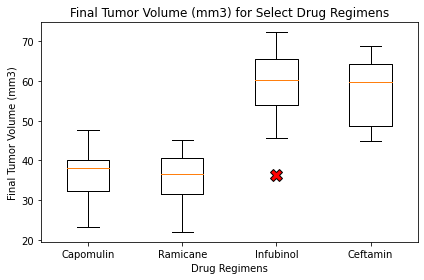

In [14]:
# Generating a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume (mm3) for Select Drug Regimens')
ax1.set_xlabel('Drug Regimens')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(final_tumor_vol, labels=regimen_names, 
            flierprops={'marker':'X', 'markerfacecolor':'red', 'markersize':12})
plt.tight_layout()

# Line and Scatter Plots

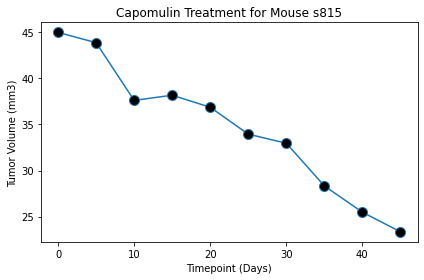

In [15]:
# Generating a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Isolating data for Mouse s185
capomulin_s185 = capomulin.loc[capomulin['Mouse ID'] == 's185']

plt.plot(capomulin_s185['Timepoint'], capomulin_s185['Tumor Volume (mm3)'], 
         marker='o', markersize=10, markerfacecolor='black')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capomulin Treatment for Mouse s815')
plt.tight_layout()

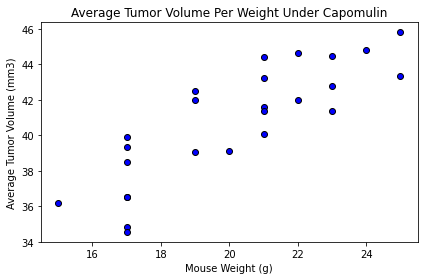

In [16]:
# Generating a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
# By Mouse ID, obtaining the mean of each column 
# (mouse weight is not affected because it does not change over the course of the experiment)
capomulin_mouse = capomulin.groupby('Mouse ID').mean()

plt.scatter(capomulin_mouse['Weight (g)'], capomulin_mouse['Tumor Volume (mm3)'], 
            marker='o', facecolors='blue', edgecolors='black')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume Per Weight Under Capomulin')
plt.tight_layout()

# Correlation and Regression

In [17]:
# Calculating the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen
# Saving only the first value (the coefficient) from the pearsonr function of scipy.stats
correlation = st.pearsonr(capomulin_mouse['Weight (g)'], capomulin_mouse['Tumor Volume (mm3)'])[0]
print(f'The correlation coefficient between mouse weight and average tumor volume is {correlation}.')

The correlation coefficient between mouse weight and average tumor volume is 0.8419363424694717.


The r-squared is: 0.7088568047708717


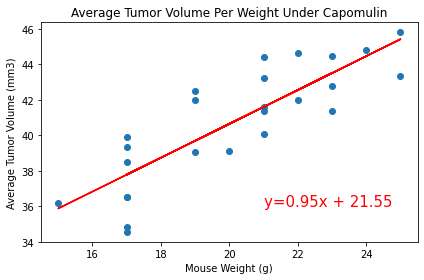

In [18]:
# Calculating the linear regression model for mouse weight and average tumor volume for the Capomulin regimen
x_values = capomulin_mouse['Weight (g)']
y_values = capomulin_mouse['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope + intercept
line_equation = 'y=' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_equation, (21,36), fontsize=15, color='red')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Average Tumor Volume Per Weight Under Capomulin')
plt.tight_layout()

# Printing the r-squared value
print(f'The r-squared is: {rvalue**2}')